So, as part of the task you need to process your data -- not least resizing it to be uniform in shape. 

You'll follow these steps:

1.   Explore the Classes
2.   Build and Train a Neural Network to recognize the difference between the two
3.   Evaluate the Training and Validation accuracy

In [3]:
#import libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np
import zipfile
import os
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#https://matplotlib.org/users/image_tutorial.html
%matplotlib inline

In [4]:
training_datagen=ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')




validation_datagen=ImageDataGenerator(
                    rescale=1./255)

In [5]:
validation_dir='Output/val'
train_dir='Output/train'


# Dataset Details

In [6]:
train_generator=training_datagen.flow_from_directory(
                    train_dir,
                    batch_size=47,
                    target_size=(160,120),
                    class_mode='categorical')



validation_generator=validation_datagen.flow_from_directory(
                    validation_dir,
                    batch_size=47,
                    target_size=(160,120),
                    class_mode='categorical')

Found 11280 images belonging to 6 classes.
Found 2820 images belonging to 6 classes.


In [8]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(2,2),activation='relu',input_shape=(160,120,3)),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                  
                                tf.keras.layers.Conv2D(32,(2,2),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                  
                                  
                                 tf.keras.layers.Conv2D(64,(2,2),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                  
                                  
                                 tf.keras.layers.Conv2D(512,(2,2),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                  
                                  
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dropout(0.5),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(6,activation='softmax')
                                 ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 159, 119, 16)      208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 79, 59, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 78, 58, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 39, 29, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 38, 28, 64)        8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 19, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 13, 512)      

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

In [13]:
history=model.fit_generator(train_generator,validation_data=validation_generator,steps_per_epoch=40,epochs=20,verbose=2)
model.save('model1.h5')

Epoch 1/20
40/40 - 41s - loss: 1.3185 - acc: 0.3819 - val_loss: 1.2457 - val_acc: 0.3833
Epoch 2/20
40/40 - 39s - loss: 1.2396 - acc: 0.4112 - val_loss: 1.2845 - val_acc: 0.4064
Epoch 3/20
40/40 - 39s - loss: 1.2126 - acc: 0.4213 - val_loss: 1.2106 - val_acc: 0.4184
Epoch 4/20
40/40 - 39s - loss: 1.2292 - acc: 0.4090 - val_loss: 1.1393 - val_acc: 0.4316
Epoch 5/20
40/40 - 39s - loss: 1.2383 - acc: 0.4016 - val_loss: 1.2094 - val_acc: 0.4099
Epoch 6/20
40/40 - 39s - loss: 1.2432 - acc: 0.4101 - val_loss: 1.2149 - val_acc: 0.4035
Epoch 7/20
40/40 - 39s - loss: 1.2118 - acc: 0.3973 - val_loss: 1.2232 - val_acc: 0.4074
Epoch 8/20
40/40 - 40s - loss: 1.2188 - acc: 0.4154 - val_loss: 1.1696 - val_acc: 0.4309
Epoch 9/20
40/40 - 42s - loss: 1.2253 - acc: 0.4149 - val_loss: 1.2949 - val_acc: 0.3940
Epoch 10/20
40/40 - 39s - loss: 1.1912 - acc: 0.4319 - val_loss: 1.0994 - val_acc: 0.4472
Epoch 11/20
40/40 - 39s - loss: 1.2044 - acc: 0.4223 - val_loss: 1.2227 - val_acc: 0.4103
Epoch 12/20
40/40 -

# Accuracy Plots

<Figure size 432x288 with 0 Axes>

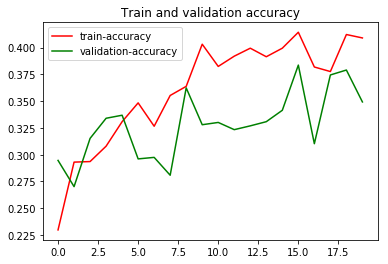

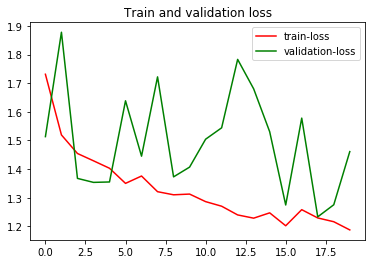

<Figure size 432x288 with 0 Axes>

In [11]:
validation_accuracy=history.history['val_acc']
train_accuracy=history.history['acc']

validation_loss=history.history['val_loss']
train_loss=history.history['loss']

epochs=range(len(train_accuracy))

plt.plot(epochs,train_accuracy,'r',label='train-accuracy')
plt.plot(epochs,validation_accuracy,'g',label='validation-accuracy')
plt.title("Train and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs,train_loss,'r',label='train-loss')
plt.plot(epochs,validation_loss,'g',label='validation-loss')
plt.title("Train and validation loss")
plt.legend()
plt.figure()